In [ ]:
# Classification of images

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test ) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
 x_train.shape,y_train.shape, x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# images as an array

In [ ]:
index = 11
x_train[index]

array([[[142, 149, 152],
        [172, 172, 167],
        [176, 168, 154],
        ...,
        [216, 212, 211],
        [198, 194, 193],
        [205, 202, 200]],

       [[191, 190, 192],
        [196, 192, 190],
        [174, 166, 159],
        ...,
        [229, 222, 220],
        [222, 215, 213],
        [217, 210, 207]],

       [[220, 212, 212],
        [217, 209, 208],
        [192, 183, 182],
        ...,
        [224, 214, 209],
        [225, 214, 210],
        [218, 208, 203]],

       ...,

       [[197, 152, 136],
        [196, 152, 135],
        [201, 156, 140],
        ...,
        [200, 165, 146],
        [199, 165, 146],
        [205, 164, 150]],

       [[196, 157, 139],
        [191, 152, 135],
        [193, 154, 136],
        ...,
        [198, 164, 144],
        [199, 165, 145],
        [201, 161, 146]],

       [[186, 150, 133],
        [182, 147, 130],
        [174, 139, 121],
        ...,
        [158, 124, 105],
        [158, 125, 106],
        [163, 125, 111]]

In [ ]:
# image as a picture

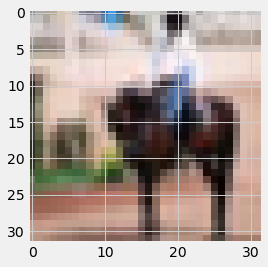

In [ ]:
img = plt.imshow(x_train[index])

In [ ]:
#label of image

In [ ]:
print(y_train[index])

[7]


In [ ]:
# getting image classifications

In [ ]:
classification = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('image class is:-', classification[y_train[index][0]])

image class is:- horse


In [ ]:
# convert label into set of 10 numbers to input into neural network

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# new labels

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# Print the new label of the image above

In [ ]:
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Normalise the pixels to the values between zeroes and ones

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

array([[[0.55686275, 0.58431373, 0.59607843],
        [0.6745098 , 0.6745098 , 0.65490196],
        [0.69019608, 0.65882353, 0.60392157],
        ...,
        [0.84705882, 0.83137255, 0.82745098],
        [0.77647059, 0.76078431, 0.75686275],
        [0.80392157, 0.79215686, 0.78431373]],

       [[0.74901961, 0.74509804, 0.75294118],
        [0.76862745, 0.75294118, 0.74509804],
        [0.68235294, 0.65098039, 0.62352941],
        ...,
        [0.89803922, 0.87058824, 0.8627451 ],
        [0.87058824, 0.84313725, 0.83529412],
        [0.85098039, 0.82352941, 0.81176471]],

       [[0.8627451 , 0.83137255, 0.83137255],
        [0.85098039, 0.81960784, 0.81568627],
        [0.75294118, 0.71764706, 0.71372549],
        ...,
        [0.87843137, 0.83921569, 0.81960784],
        [0.88235294, 0.83921569, 0.82352941],
        [0.85490196, 0.81568627, 0.79607843]],

       ...,

       [[0.77254902, 0.59607843, 0.53333333],
        [0.76862745, 0.59607843, 0.52941176],
        [0.78823529, 0

In [ ]:
#models architecture

In [ ]:
model = Sequential()

# first layer
model.add(Conv2D(32,(5,5), activation='relu',input_shape=(32,32,3)))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
#second layer
model.add(Conv2D(32,(5,5), activation='relu') )
# second pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# flattening layer
model.add(Flatten())
# layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

# layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile the model

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split =0.2)

Epoch 1/10
157/157 [==============================] - 51s 321ms/step - loss: 1.9625 - accuracy: 0.2710 - val_loss: 1.5214 - val_accuracy: 0.4531
Epoch 2/10
157/157 [==============================] - 50s 317ms/step - loss: 1.4783 - accuracy: 0.4682 - val_loss: 1.3245 - val_accuracy: 0.5347
Epoch 3/10
157/157 [==============================] - 50s 316ms/step - loss: 1.3153 - accuracy: 0.5313 - val_loss: 1.3527 - val_accuracy: 0.5191
Epoch 4/10
157/157 [==============================] - 50s 317ms/step - loss: 1.2212 - accuracy: 0.5638 - val_loss: 1.1353 - val_accuracy: 0.5990
Epoch 5/10
157/157 [==============================] - 49s 315ms/step - loss: 1.1602 - accuracy: 0.5888 - val_loss: 1.0835 - val_accuracy: 0.6202
Epoch 6/10
157/157 [==============================] - 49s 315ms/step - loss: 1.0964 - accuracy: 0.6118 - val_loss: 1.0436 - val_accuracy: 0.6340
Epoch 7/10
157/157 [==============================] - 50s 316ms/step - loss: 1.0232 - accuracy: 0.6359 - val_loss: 1.0200 - val_ac

In [ ]:
# Evaluation of model using the data set

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.9489 - accuracy: 0.6691


0.6690999865531921

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('maodel accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Visualization of model loss

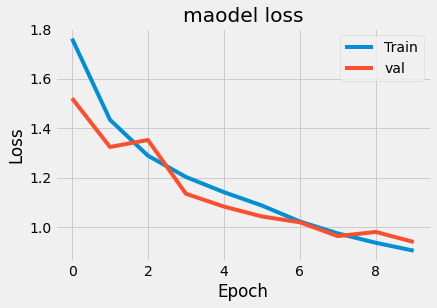

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('maodel loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [ ]:
# testing model with example
from google.colab import files
uploaded = files.upload()

Saving truck.jpg to truck.jpg


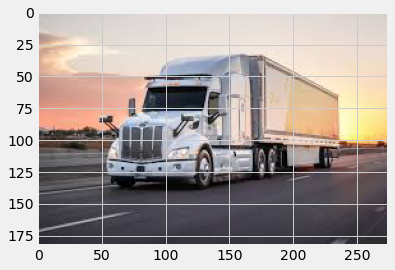

In [ ]:
# Show the image
test_img = plt.imread('truck.jpg')
img = plt.imshow(test_img)

In [ ]:
# Resize the image

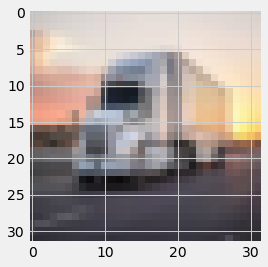

In [ ]:
from skimage.transform import resize
resized_img = resize(test_img, (32,32,3))
img = plt.imshow(resized_img)

In [ ]:
# Get the prediction

In [ ]:
predictions = model.predict(np.array([resized_img]))
predictions

array([[3.5370123e-02, 1.3312639e-01, 7.7626802e-04, 9.0287713e-04,
        1.5648970e-05, 2.5281121e-04, 5.3754593e-05, 2.0479526e-04,
        5.0184652e-02, 7.7911270e-01]], dtype=float32)

In [ ]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] >  x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
    print(list_index)

In [ ]:
# print first 5 predictions

In [ ]:
for i in range (5):
  print(classification[list_index[i]], '--',predictions[0][list_index[i]] * 100, '%')

truck -- 77.9112696647644 %
automobile -- 13.31263929605484 %
ship -- 5.018465220928192 %
airplane -- 3.5370122641324997 %
cat -- 0.0902877131011337 %
